<a href="https://colab.research.google.com/github/weiyunna/Data-Visualization/blob/master/Introduction_to_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib Tutorial: Python Plotting

This Matplotlib tutorial takes you through the basics Python data visualization: the anatomy of a plot, pyplot and pylab, and much more

Humans are very visual creatures: we understand things better when we see things visualized. However, the step to presenting analyses, results or insights can be a bottleneck: you might not even know where to start or you might have already a right format in mind, but then questions like “Is this the right way to visualize the insights that I want to bring to my audience?” will have definitely come across your mind.

When you’re working with the Python plotting library Matplotlib, the first step to answering the above questions is by building up knowledge on topics like:

* **The anatomy of a Matplotlib plot:** what is a subplot? What are the Axes? What exactly is a figure?
* **Plot creation**, which could raise questions about what module you exactly need to import (pylab or pyplot?), how you exactly should go about initializing the figure and the Axes of your plot, how to use matplotlib in Jupyter notebooks, etc.
* **Plotting routines**, from simple ways to plot your data to more advanced ways of visualizing your data.
* **Basic plot customizations**, with a focus on plot legends and text, titles, axes labels and plot layout.
*  **Saving, showing, clearing, … your plots**: show the plot, save one or more figures to, for example, pdf files, clear the axes, clear the figure or close the plot, etc.
* Lastly, you’ll briefly cover two ways in which you can **customize Matplotlib**: with style sheets and the rc settings.


# What Does A Matplotlib Python Plot Look Like?

At first sight, it will seem that there are quite some components to consider when you start plotting with this Python data visualization library. You’ll probably agree with me that it’s confusing and sometimes even discouraging seeing the amount of code that is necessary for some plots, not knowing where to start yourself and which components you should use.

Luckily, this library is very flexible and has a lot of handy, built-in defaults that will help you out tremendously. As such, you don’t need much to get started: you need to make the necessary imports, prepare some data, and you can start plotting with the help of the plot() function! When you’re ready, don’t forget to show your plot using the show() function.

Look at this example to see how easy it really is:

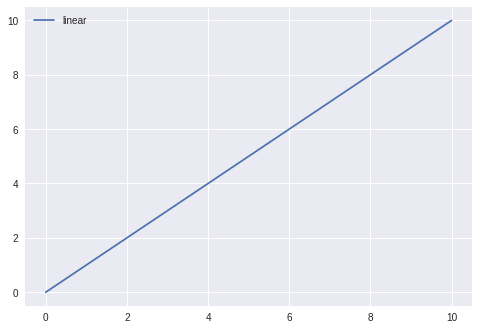

In [1]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
x = np.linspace(0, 10, 100)

# Plot the data
plt.plot(x, x, label='linear')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Note that you import the** pyplot** module of the** matplotlib library** under the alias **plt.**

What you can’t see on the surface is that you have -maybe unconsciously- made use of the built-in defaults that take care of the creation of the underlying components, such as the Figure and the Axes. You’ll read more about these defaults in the section that deals with the differences between pylab and pyplot.

For now, you’ll understand that working with matplotlib will already become a lot easier when you understand how the underlying components are instantiated. Or, in other words, what the anatomy of a matplotlib plot looks like:


In essence, there are two big components that you need to take into account:

* The **Figure** is the overall window or page that everything is drawn on. It’s the top-level component of all the ones that you will consider in the following points. You can create multiple independent Figures. A Figure can have several other things in it, such as a suptitle, which is a centered title to the figure. You’ll also find that you can add a legend and color bar, for example, to your Figure.
* To the figure you add Axes. The Axes is the area on which the data is plotted with functions such as **plot() ** and **scatter()** and that can have ticks, labels, etc. associated with it. This explains why Figures can contain multiple Axes.

**Tip:** when you see, for example, **plt.xlim**, you’ll call **ax.set_xlim()** behind the covers. All methods of an Axes object exist as a function in the pyplot module and vice versa. Note that mostly, you’ll use the functions of the pyplot module because they’re much cleaner, at least for simple plots!

You’ll see what “clean” means when you take a look at the following pieces of code. Compare, for example, this piece of code:



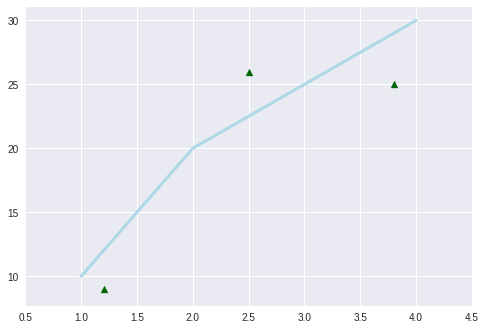

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

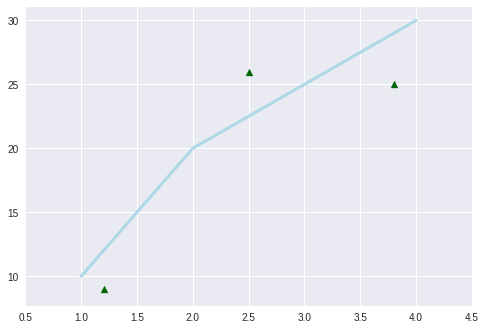

In [3]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 4.5)
plt.show()

However, if you have multiple axes, it’s still better to make use of the first code chunk because it’s always better to prefer explicit above implicit code! In such cases, you want to make use of the Axes object **ax**.

Next to these two components, there are a couple more that you can keep in mind:

* Each Axes has an **x-axis **and a **y-axis**, which contain **ticks**, which have major and minor ticklines and ticklabels. There’s also the axis **labels**, **title**, and **legend** to consider when you want to customize your axes, but also taking into account the axis ** scales**  and **gridlines** might come in handy.

* **Spines** are lines that connect the axis tick marks and that designate the boundaries of the data area. In other words, they are the simple black square that you get to see when you don’t plot any data at all but when you have initialized the Axes, like in the picture below:

**Note** that you’ll sometimes also read about **Artist objects**, which are virtually all objects that the package has to offers to users like yourself. Everything drawn using Matplotlib is part of the Artist module. The containers that you will use to plot your data, such as Axis, Axes and Figure, and other graphical objects such as text, patches, etc. are types of Artists.

#Multiple Axes

We've mentioned before that a figure can have more than one Axes on it. If you want your axes to be on a regular grid system, then it's easiest to use **plt.subplots(...) ** to create a figure and add the axes to it automatically.

For example:

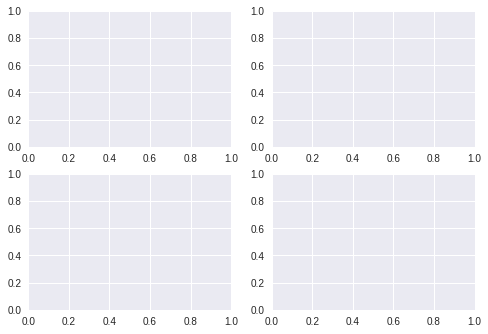

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.show()


**plt.subplots(...)** created a new figure and added 4 subplots to it. The axes object that was returned is a 2D numpy object array. Each item in the array is one of the subplots. They're laid out as you see them on the figure.

Therefore, when we want to work with one of these axes, we can index the axes array and use that item's methods.

For example:

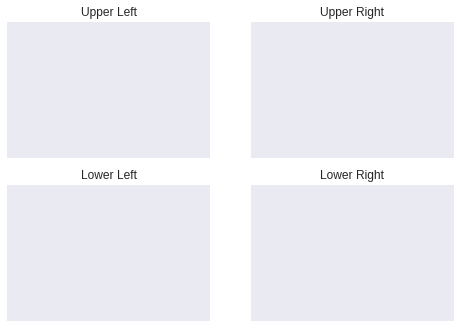

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()


One really nice thing about **plt.subplots()** is that when it's called with no arguments, it creates a new figure with a single subplot.

Any time you see something like

`fig = plt.figure()`

`ax = fig.add_subplot(111)`

You can replace it with:
 
 `fig, ax = plt.subplots()`
 
We'll be using that approach for the rest of the examples. It's much cleaner.

However, keep in mind that we're still creating a figure and adding axes to it. When we start making plot layouts that can't be described by subplots, we'll go back to creating the figure first and then adding axes to it one-by-one.

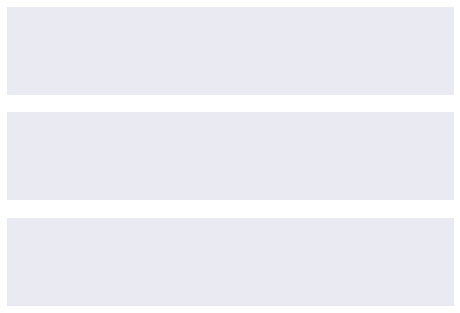

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=1)

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


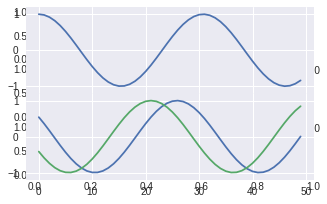

In [57]:

# Try to reproduce the figure shown in images/exercise_1-1.png
fig, axes = plt.subplots(nrows=3, ncols=1)

ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.cos(x))
ax2.plot(np.cos(x+1))
ax3.plot(np.cos(x+2))


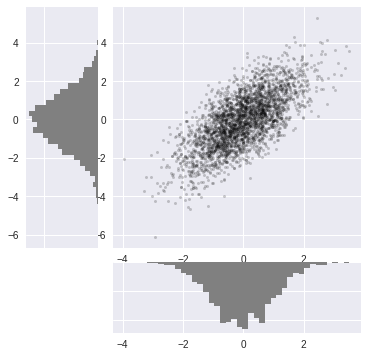

In [20]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

Text(0.5, 1.0, 'Signal 3')

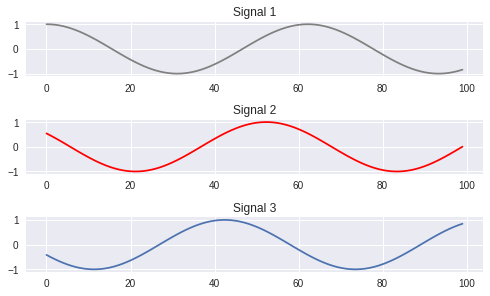

In [55]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(6, 6, hspace=0.8, wspace=0.8)
ax1 = fig.add_subplot(grid[0, 1:])
ax2 = fig.add_subplot(grid[1, 1:], sharex=ax1)
ax3 = fig.add_subplot(grid[2, 1:], sharex=ax1)

x = np.linspace(0, 10,100)
ax1.plot(np.cos(x), color='gray')
ax1.set_title('Signal 1')
ax2.plot(np.cos(x+1), color='red')
ax2.set_title('Signal 2')
ax3.plot(np.cos(x+2))
ax3.set_title('Signal 3')


